# Handling missing Values

In [27]:
import pandas as pd
import missingno as msno
import numpy as np

In [38]:
data = pd.read_csv("Titanic dataset.csv")

In [4]:
data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [18]:
data.shape

(418, 11)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


<AxesSubplot:>

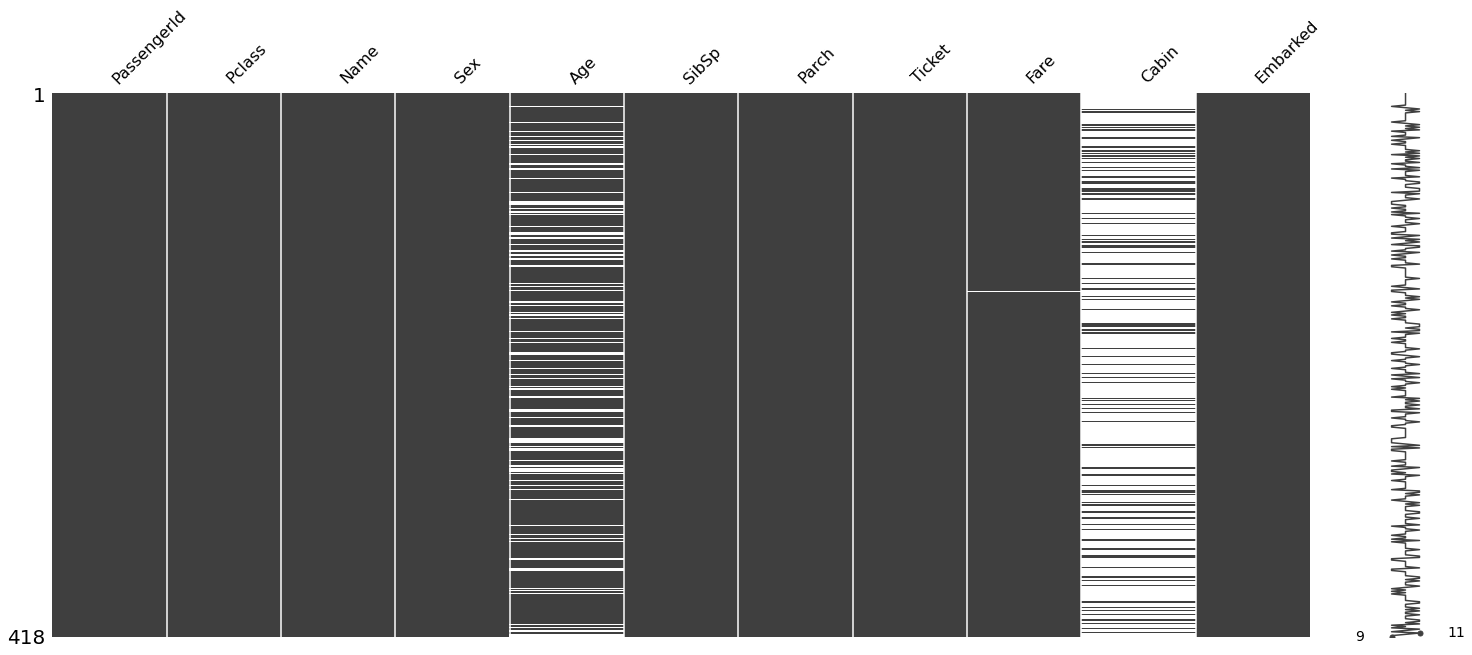

In [7]:
msno.matrix(data)

<AxesSubplot:>

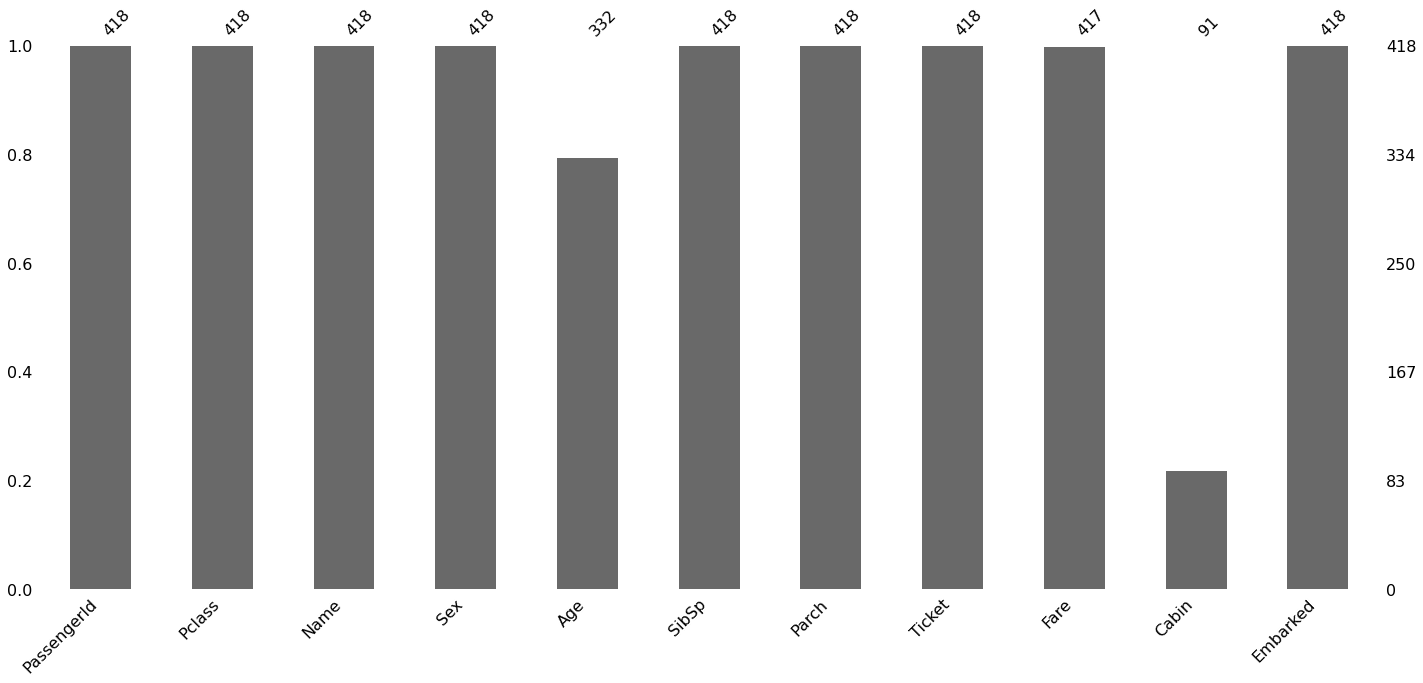

In [9]:
msno.bar(data)

# Delete Rows with Missing Values

Missing values can be handled by deleting the rows or columns having null values. If columns have more than half of rows as null then the entire column can be dropped. The rows which are having one or more columns values as null can also be dropped

In [17]:
data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [19]:
data.dropna(inplace = True)

In [20]:
data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

# Impute missing values with Mean/Median:

Columns in the dataset which are having numeric continuous values can be replaced with the mean, median, or mode of remaining values in the column. This method can prevent the loss of data compared to the earlier method. Replacing the above two approximations (mean, median) is a statistical approach to handle the missing values.

In [26]:
data['Age'][:25]

0     34.5
1     47.0
2     62.0
3     27.0
4     22.0
5     14.0
6     30.0
7     26.0
8     18.0
9     21.0
10     NaN
11    46.0
12    23.0
13    63.0
14    47.0
15    24.0
16    35.0
17    21.0
18    27.0
19    45.0
20    55.0
21     9.0
22     NaN
23    21.0
24    48.0
Name: Age, dtype: float64

In [28]:
data["Age"] = data["Age"].replace(np.nan, data['Age'].mean())

In [30]:
data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [35]:
data["Fare"] = data["Fare"].replace(np.nan, data['Fare'].median())

<AxesSubplot:>

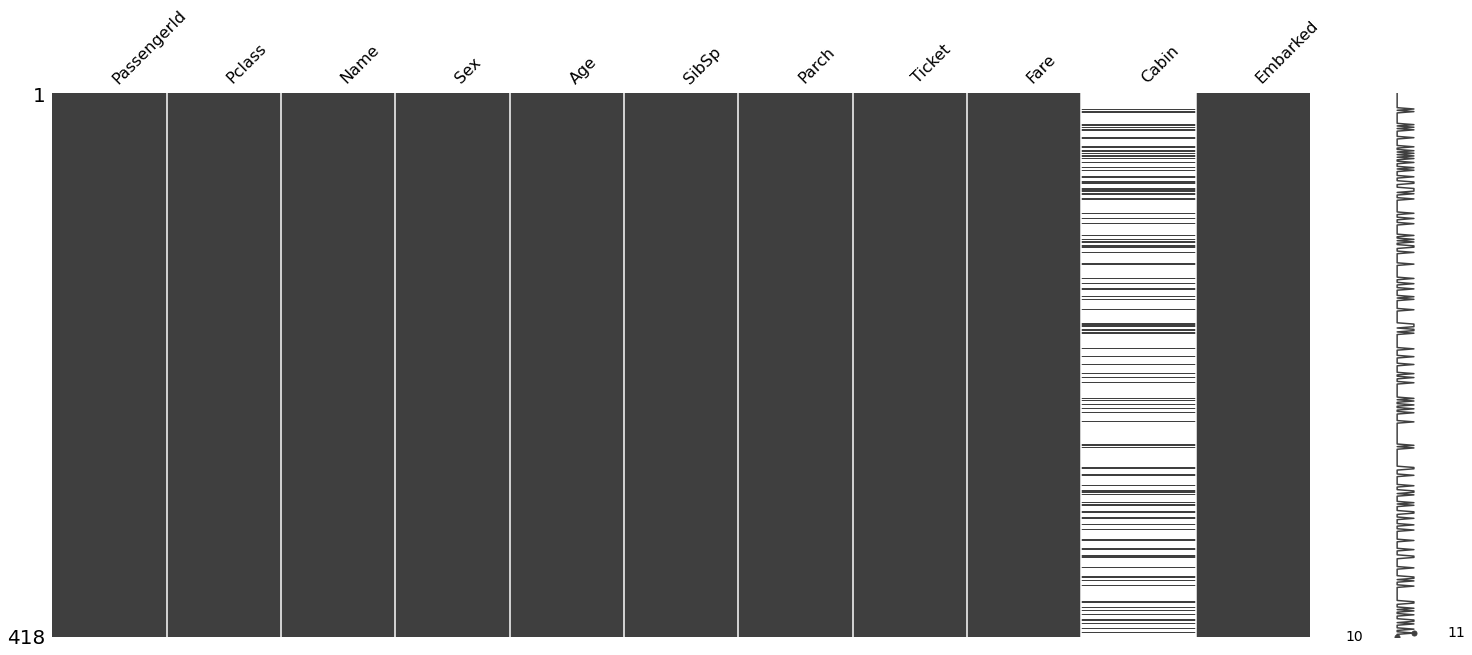

In [36]:
msno.matrix(data)

# Imputation method for categorical columns:

When missing values is from categorical columns (string or numerical) then the missing values can be replaced with the most frequent category. If the number of missing values is very large then it can be replaced with a new category.

In [39]:
data['Cabin'] = data['Cabin'].fillna(value = "U")

<AxesSubplot:>

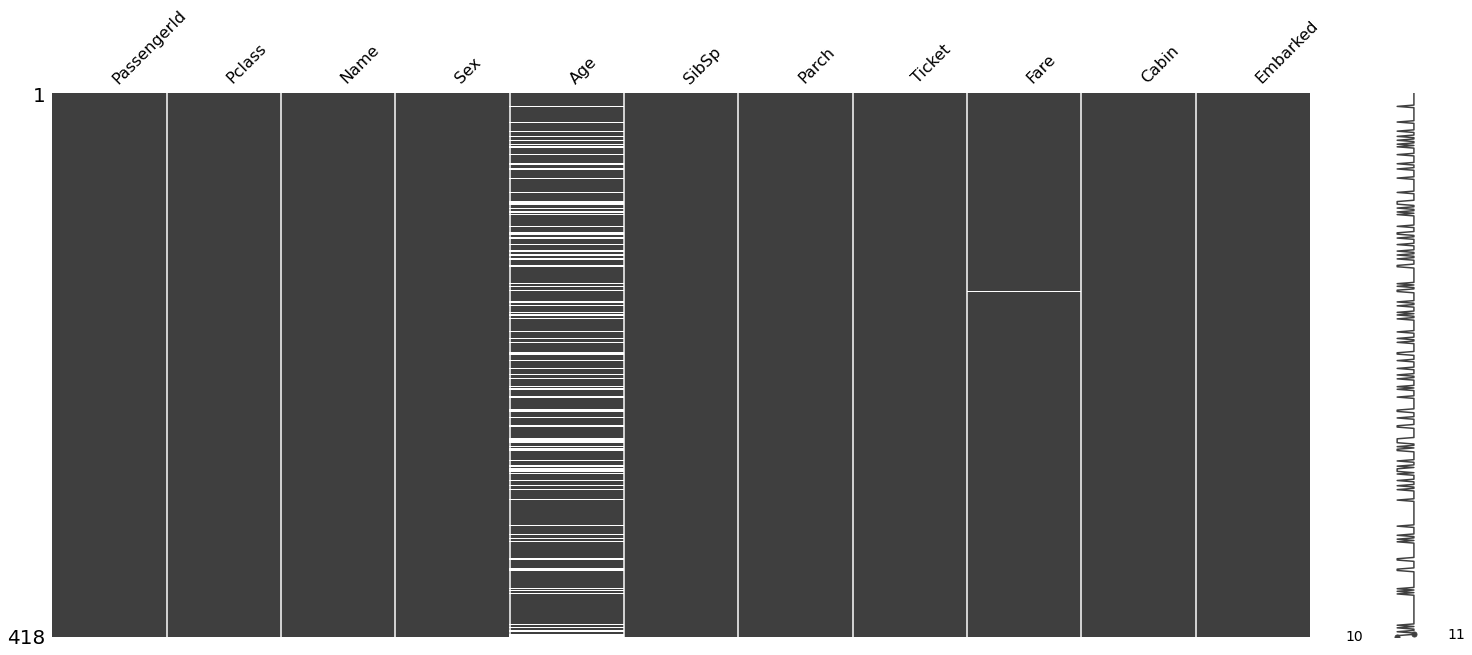

In [40]:
msno.matrix(data)